In [1]:
#import load_data
#from load_data import DataGenerator
from load_data import get_images, image_file_to_array

/home/jack/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jack/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jack/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jack/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWa

In [3]:
([0,1,2,3,4])[-3:]

[2, 3, 4]

In [2]:
import numpy as np
import os
import random
import tensorflow as tf
from scipy import misc

class DataGenerator(object):
    """
    Data Generator capable of generating batches of Omniglot data.
    A "class" is considered a class of omniglot digits.
    """

    def __init__(self, num_classes, num_samples_per_class, config={}):
        """
        Args:
            num_classes: Number of classes for classification (K-way)
            num_samples_per_class: num samples to generate per class in one batch
            batch_size: size of meta batch size (e.g. number of functions)
        """
        self.num_samples_per_class = num_samples_per_class
        self.num_classes = num_classes

        config = {'sad':''}

        data_folder = config.get('data_folder', './omniglot_resized')
        self.img_size = config.get('img_size', (28, 28))

        self.dim_input = np.prod(self.img_size)
        self.dim_output = self.num_classes
        
       

        character_folders = [os.path.join(data_folder, family, character)
                             for family in os.listdir(data_folder)
                             if os.path.isdir(os.path.join(data_folder, family))
                             for character in os.listdir(os.path.join(data_folder, family))
                             if os.path.isdir(os.path.join(data_folder, family, character))]

        random.seed(1)
        random.shuffle(character_folders)
        num_val = 100
        num_train = 1100
        self.metatrain_character_folders = character_folders[: num_train]
        self.metaval_character_folders = character_folders[
            num_train:num_train + num_val]
        self.metatest_character_folders = character_folders[
            num_train + num_val:]

    def sample_batch(self, batch_type, batch_size=1, k_samples=1, n_classes=5):
        """
        Samples a batch for training, validation, or testing
        Args:
            batch_type: train/val/test
        Returns:
            A a tuple of (1) Image batch and (2) Label batch where
            image batch has shape [B, K, N, 784] and label batch has shape [B, K, N, N]
            where B is batch size, K is number of samples per class, N is number of classes
        """
        if batch_type == "train":
            folders = self.metatrain_character_folders
        elif batch_type == "val":
            folders = self.metaval_character_folders
        else:
            folders = self.metatest_character_folders

        #############################
        #### YOUR CODE GOES HERE ####
        pixels = 28*28
        all_image_batches = np.ndarray((batch_size, k_samples, n_classes, pixels))
        all_label_batches = np.ndarray((batch_size, k_samples, n_classes, n_classes))
        #print("all_image_batches shape: ", all_image_batches.shape)
        for b in range(batch_size):
            # Take N samples from all alphabet folders
            sample_paths  = random.sample(folders, n_classes)
            sample_labels = [os.path.basename(os.path.split(family)[0]) for family in sample_paths]
            images_labels = get_images(sample_paths, sample_labels, k_samples)
            
            # TODO: COrrect use of dimension
            count = 0
            for k in range(k_samples):
                for n in range(n_classes):
                    #print(images_labels[count][1])
                    all_image_batches[b, k, n, :] = image_file_to_array(filename=images_labels[count][1], dim_input=pixels)
                    #print(np.repeat([images_labels[count][0]], n_classes, axis=0))
                    #all_label_batches[b, k, n, :] = np.repeat([images_labels[count][0]], n_classes, axis=0)
                    # Labels as one-hot vectors
                    all_label_batches[b, k, n, :] = np.zeros(n_classes)
                    all_label_batches[b, k, n, count] = 1
                    count +=1
            #############################

        return all_image_batches, all_label_batches


In [3]:
c = {'data_folder':'./'}
data = DataGenerator(5, 1, 16)

In [4]:
images, labels = data.sample_batch('train', batch_size=10)
print("Batch of images of shape:", images.shape)
print("Batch of labels of shape:", labels.shape)

Batch of images of shape: (10, 1, 5, 784)
Batch of labels of shape: (10, 1, 5, 5)


In [5]:
for i in range(5):
    print(labels[0,0,i])

[1. 0. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 0. 0. 1.]


In [7]:
import matplotlib.pyplot as plt

Class:  [1. 0. 0. 0. 0.]


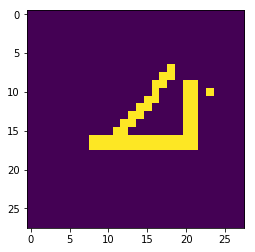

Class:  [0. 1. 0. 0. 0.]


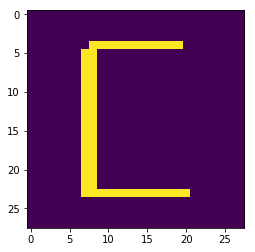

Class:  [0. 0. 1. 0. 0.]


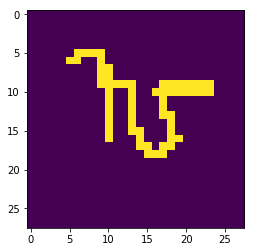

Class:  [0. 0. 0. 1. 0.]


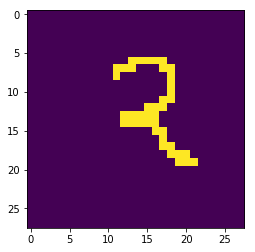

Class:  [0. 0. 0. 0. 1.]


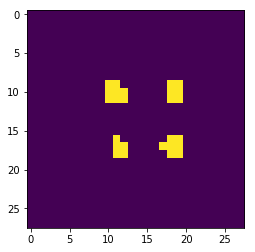

In [8]:
for i in range(5):
    print("Class: ", labels[0,0,i])
    plt.imshow(images[0,0,i].reshape((28,28)))
    plt.show()

In [9]:
print("# samples per class:", data.num_samples_per_class)
print("# classes:",  data.num_classes)
print("Image size:", data.img_size)
print("Input dimension:", data.dim_input)
print("Output dimension:",data.dim_output)


# samples per class: 1
# classes: 5
Image size: (28, 28)
Input dimension: 784
Output dimension: 5


In [10]:
print("# of meta train folders:", len(data.metatrain_character_folders))
print("# of meta val folders:  ", len(data.metaval_character_folders))
print("# of meta test folders: ", len(data.metatest_character_folders))

# of meta train folders: 1100
# of meta val folders:   100
# of meta test folders:  423


In [11]:
data.metatrain_character_folders[0:10]

['./omniglot_resized/Early_Aramaic/character05',
 './omniglot_resized/Malayalam/character40',
 './omniglot_resized/Ojibwe_(Canadian_Aboriginal_Syllabics)/character12',
 './omniglot_resized/Tifinagh/character09',
 './omniglot_resized/Kannada/character02',
 './omniglot_resized/Armenian/character34',
 './omniglot_resized/Gurmukhi/character18',
 './omniglot_resized/Kannada/character25',
 './omniglot_resized/Gurmukhi/character17',
 './omniglot_resized/Japanese_(katakana)/character31']

In [12]:
data.metatest_character_folders[0:3]

['./omniglot_resized/Braille/character12',
 './omniglot_resized/N_Ko/character12',
 './omniglot_resized/Glagolitic/character21']

In [13]:
get_images(data.metatest_character_folders[0:3],['asd','N_Ko','Glagolitic'],1)

[('asd', './omniglot_resized/Braille/character12/0203_11.png'),
 ('Glagolitic', './omniglot_resized/Glagolitic/character21/1135_18.png'),
 ('N_Ko', './omniglot_resized/N_Ko/character12/0815_07.png')]

In [14]:
[os.path.basename(os.path.split(family)[0]) for family in data.metatest_character_folders[0:3]]

['Braille', 'N_Ko', 'Glagolitic']

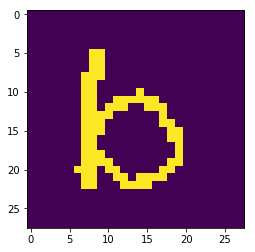

In [15]:
plt.imshow(image_file_to_array('./omniglot_resized/N_Ko/character12/0815_17.png', 784).reshape((28,28)))

# b)

In [ ]:
import numpy as np
import random
import tensorflow as tf
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior() 
from load_data import DataGenerator
from tensorflow.python.platform import flags
from tensorflow.keras import layers

FLAGS = flags.FLAGS

flags.DEFINE_integer(
    'num_classes', 5, 'number of classes used in classification (e.g. 5-way classification).')

flags.DEFINE_integer('num_samples', 1,
                     'number of examples used for inner gradient update (K for K-shot learning).')

flags.DEFINE_integer('meta_batch_size', 16,
                     'Number of N-way classification tasks per batch')


def loss_function(preds, labels):
    """
    Computes MANN loss
    Args:
        preds: [B, K+1, N, N] network output
        labels: [B, K+1, N, N] labels
    Returns:
        scalar loss
    """
    #############################
    #### YOUR CODE GOES HERE ####
    pass
    #############################


class MANN(tf.keras.Model):

    def __init__(self, num_classes, samples_per_class):
        super(MANN, self).__init__()
        self.num_classes = num_classes
        self.samples_per_class = samples_per_class
        self.layer1 = tf.keras.layers.LSTM(128, return_sequences=True)
        self.layer2 = tf.keras.layers.LSTM(num_classes, return_sequences=True)

    def call(self, input_images, input_labels):
        """
        MANN
        Args:
            input_images: [B, K+1, N, 784] flattened images
            labels: [B, K+1, N, N] ground truth labels
        Returns:
            [B, K+1, N, N] predictions
        """
        #############################
        #### YOUR CODE GOES HERE ####
        pass
        #############################
        return out

ims = tf.placeholder(tf.float32, shape=(
    None, FLAGS.num_samples + 1, FLAGS.num_classes, 784))
labels = tf.placeholder(tf.float32, shape=(
    None, FLAGS.num_samples + 1, FLAGS.num_classes, FLAGS.num_classes))

data_generator = DataGenerator(
    FLAGS.num_classes, FLAGS.num_samples + 1)

o = MANN(FLAGS.num_classes, FLAGS.num_samples + 1)
out = o(ims, labels)

loss = loss_function(out, labels)
optim = tf.train.AdamOptimizer(0.001)
optimizer_step = optim.minimize(loss)

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    sess.run(tf.global_variables_initializer())

    for step in range(50000):
        i, l = data_generator.sample_batch('train', FLAGS.meta_batch_size)
        feed = {ims: i.astype(np.float32), labels: l.astype(np.float32)}
        _, ls = sess.run([optimizer_step, loss], feed)

        if step % 100 == 0:
            print("*" * 5 + "Iter " + str(step) + "*" * 5)
            i, l = data_generator.sample_batch('test', 100)
            feed = {ims: i.astype(np.float32),
                    labels: l.astype(np.float32)}
            pred, tls = sess.run([out, loss], feed)
            print("Train Loss:", ls, "Test Loss:", tls)
            pred = pred.reshape(
                -1, FLAGS.num_samples + 1,
                FLAGS.num_classes, FLAGS.num_classes)
            pred = pred[:, -1, :, :].argmax(2)
            l = l[:, -1, :, :].argmax(2)
            print("Test Accuracy", (1.0 * (pred == l)).mean())
